In [2]:
import tifffile as tiff
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.gridspec as gridspec


In [3]:
in_file = "data/test1.tif"

In [4]:
with tiff.TiffFile(in_file) as tif:
    images = tif.asarray()
    metadata = tif[0].tags

In [5]:
images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

In [6]:
df = pd.DataFrame({"chan1":images[0].flatten(), "chan2":images[1].flatten()}, )

In [92]:
df[df == 0] = np.nan

In [93]:
df = df - 10000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012159198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001281E208>]], dtype=object)

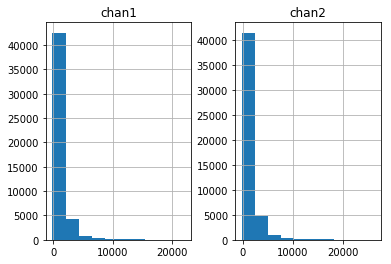

In [94]:
df.hist()

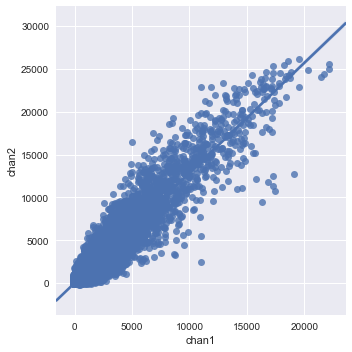

In [9]:
sns.lmplot(x = 'chan1', y = 'chan2', data = df)

In [42]:
df.corr()

,chan1,chan2
chan1,1.000000,0.941555
chan2,0.941555,1.000000


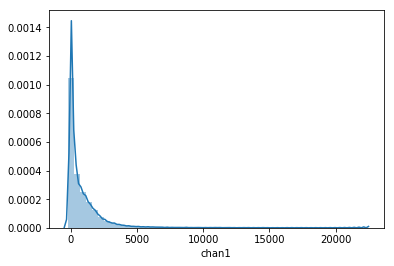

In [44]:
sns.distplot(df["chan1"].dropna(), )

In [30]:
lm = LinearRegression()

In [37]:
lm.fit(X = df["chan1"].dropna().values.reshape(-1, 1), y = df["chan2"].dropna().values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y_pred = lm.predict(df["chan1"].dropna().reshape(-1, 1))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [38]:
from sklearn.metrics import r2_score


In [36]:
r2 = r2_score(df["chan2"].dropna().reshape(-1, 1), y_pred)
r2

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


0.88652529532045099

In [40]:
df_norm = pd.DataFrame()
df_norm["chan1"] = df["chan1"] / np.mean(df["chan1"]) 

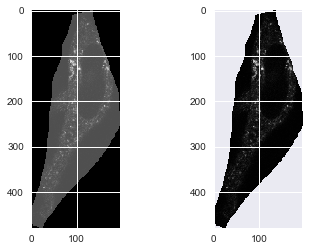

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(images[0], cmap = plt.cm.gray)
ax2.imshow(df_norm["chan1"].values.reshape(479, 195), cmap = plt.cm.gray)




In [48]:
images[0].shape

(479, 195)

In [99]:
df_norm = df.apply(lambda x: x / x.max(), axis = 0)

In [100]:
df_norm["chan2"].max()

1.0

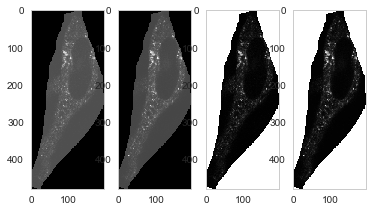

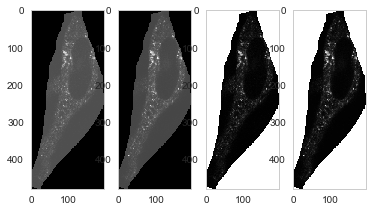

In [88]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4)
ax1.imshow(images[0], cmap = plt.cm.gray)
ax2.imshow(images[1], cmap = plt.cm.gray)
ax3.imshow(df_norm["chan1"].values.reshape(479,195), cmap = plt.cm.gray)
ax4.imshow(df_norm["chan2"].values.reshape(479,195), cmap = plt.cm.gray)
fig

In [91]:
lm2 = LinearRegression()
lm2.fit(X = df_norm["chan1"].dropna().values.reshape(-1, 1), y = df_norm["chan2"].dropna().values.reshape(-1, 1))
y_pred2 = lm2.predict(df_norm["chan1"].dropna().values.reshape(-1, 1))
#r2_score(df_norm["chan2"].dropna().reshape(-1, 1), y_pred2)

In [92]:
r2_score(df_norm["chan2"].dropna().values.reshape(-1, 1), y_pred2)

0.88652529532045099

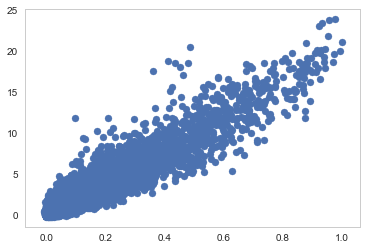

In [103]:
plt.scatter(df_norm["chan2"].dropna(), y_pred2)

In [90]:
df_norm.dropna().corr()

,chan1,chan2
chan1,1.000000,0.941555
chan2,0.941555,1.000000


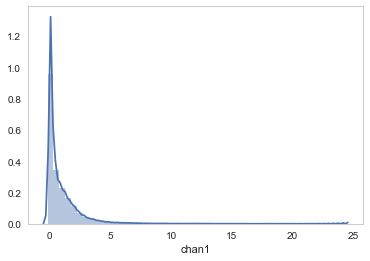

In [97]:
sns.distplot(df_norm["chan1"].dropna())


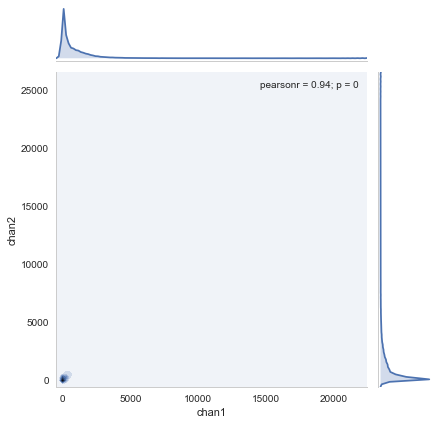

In [102]:
sns.jointplot(x = "chan1", y = "chan2", data = df, kind = "kde")

In [107]:
df_filter = np.nan(df[df < (0.1 * df.max())])

TypeError: 'float' object is not callable

In [108]:
df_filter = df.copy()

In [112]:
df_filter = df_filter.clip(lower = (0.1 * df.max()), axis = 0)

/anaconda/lib/python3.6/site-packages/pandas/core/ops.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  result = op(x, y)
/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py:2984: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [114]:
df_filter.min()

chan1   NaN
chan2   NaN
dtype: float64

In [2]:
gpi_file = "data/test_gpi1.tif"

In [3]:
with tiff.TiffFile(gpi_file) as tif:
    gpi_images = tif.asarray()
    gpi_meta = tif[0].tags

NameError: name 'axes' is not defined

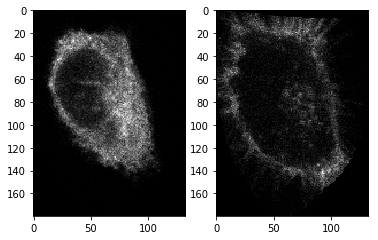

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(gpi_images[0], cmap = plt.cm.gray)
ax2.imshow(gpi_images[2], cmap = plt.cm.gray)

In [8]:
gpi_images[0].shape

(180L, 133L)

In [9]:
gpi_df = pd.DataFrame({"chan1":gpi_images[0].flatten(), "chan2":gpi_images[2].flatten()}, )

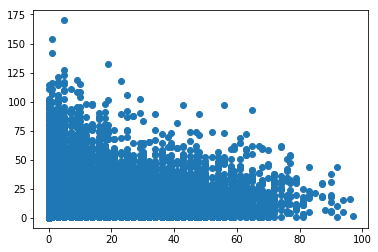

In [10]:
plt.scatter(x = "chan1", y = "chan2", data = gpi_df)

In [11]:
gpi_df.corr()

,chan1,chan2
chan1,1.0000,0.1286
chan2,0.1286,1.0000


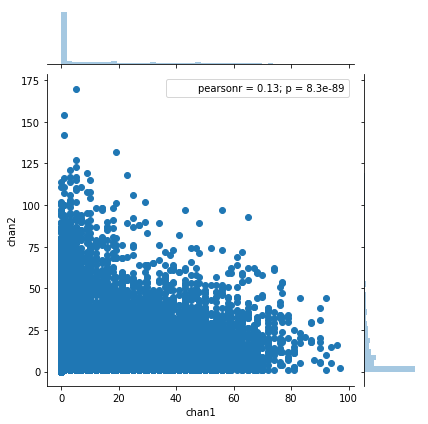

In [40]:
sns.jointplot(x = "chan1", y = "chan2", data = gpi_df)

In [26]:
gpi_df["chan1"].loc[gpi_df["chan1"] > (0.1 * max(gpi_df["chan1"]))].head(100)

2159    10
2161    10
2162    14
2169    16
2194    12
2291    14
2292    10
2294    18
2295    18
2296    23
2302    16
2303    39
2305    10
2324    10
2423    10
2424    16
2425    29
2426    14
2427    21
2428    12
2429    14
2430    14
2431    12
2433    25
2434    25
2435    18
2436    23
2437    29
2438    16
2440    16
        ..
2597    14
2598    14
2599    10
2605    16
2688    10
2689    14
2690    19
2691    25
2692    27
2693    30
2694    50
2695    41
2696    25
2697    19
2698    23
2699    39
2700    52
2701    32
2702    58
2703    32
2704    29
2705    39
2706    27
2707    21
2708    12
2710    16
2711    10
2712    18
2713    47
2714    19
Name: chan1, Length: 100, dtype: uint8

In [34]:
gpi_df["chan1"][(gpi_df["chan1"] < (0.1 * gpi_df["chan1"].max())) & (gpi_df["chan2"] < (0.1 * gpi_df["chan2"].max()))] = np.nan()

TypeError: 'float' object is not callable

In [35]:
gpi_df["chan1"].iloc[(gpi_df["chan1"] < (0.1 * gpi_df["chan1"].max())) & (gpi_df["chan2"] < (0.1 * gpi_df["chan2"].max()))]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [39]:
lm_gpi = LinearRegression()
lm_gpi.fit(X = gpi_df["chan1"].dropna().values.reshape(-1, 1), y = gpi_df["chan2"].dropna().values.reshape(-1, 1))
y_pred_gpi = lm_gpi.predict(gpi_df["chan1"].dropna().values.reshape(-1, 1))
r2_score(gpi_df["chan2"].dropna().reshape(-1, 1), y_pred_gpi)

C:\Users\Peter\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


0.016537990664015068

In [87]:
plt.scatter(y_pred_gpi - gpi_df["chan2"].dropna())

Exception: Data must be 1-dimensional

In [58]:
test_df = pd.DataFrame()
for item in range(len(gpi_images)):
    test_df.append({"chan{}".format(item + 1):gpi_images[item].flatten()}, ignore_index = True)
    

    
#gpi_df = pd.DataFrame({"chan1":gpi_images[0].flatten(), "chan2":gpi_images[2].flatten()}, )

In [59]:
test_df

""


In [83]:
test_dict = {}
for i in range(len(gpi_images)):
    #temp_df = pd.DataFrame({"chan{}".format(i + 1):df.flatten()})
    test_dict["chan{}".format(i+1)] = gpi_images[i].flatten()
   

In [84]:
print test_dict

{'chan4': array([255, 255, 255, ...,   0,   0,   0], dtype=uint8), 'chan1': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 'chan3': array([ 4,  1, 10, ...,  0,  0,  0], dtype=uint8), 'chan2': array([3, 0, 3, ..., 0, 0, 0], dtype=uint8)}


In [85]:
pd.DataFrame(test_dict)

,chan1,chan2,chan3,chan4
0,0,3,4,255
1,0,0,1,255
2,0,3,10,255
3,0,0,1,255
4,0,0,1,255
5,0,1,1,255
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [101]:
#df_filter = df.copy()
df_filter["chan1"].min()

152.0

In [100]:
df_filter[(df_filter["chan1"] < (0.1 * df_filter["chan1"].max())) & (df_filter["chan2"] < (0.1 * df_filter["chan2"].max()))] = np.nan

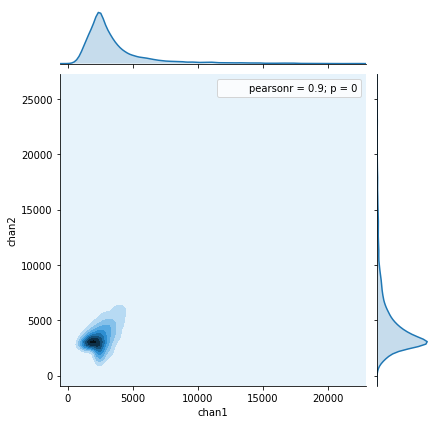

In [103]:
sns.jointplot(x = "chan1", y = "chan2", data = df_filter, kind = "kde")

In [104]:
df_filter[(df_filter["chan1"] < (0 * df_filter["chan1"].max())) & (df_filter["chan2"] < (0 * df_filter["chan2"].max()))]

,chan1,chan2


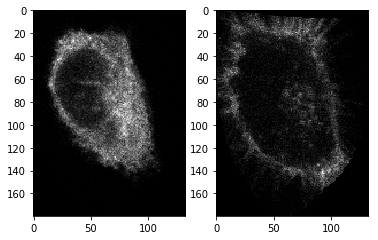

In [106]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(gpi_images[0], cmap = plt.cm.gray)
ax2.imshow(gpi_images[2], cmap = plt.cm.gray)

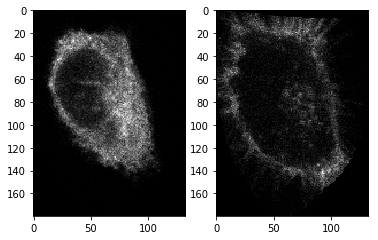

In [108]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(gpi_images[0] / np.mean(gpi_images[0]), cmap = plt.cm.gray)
ax2.imshow(gpi_images[2] / np.mean(gpi_images[2]), cmap = plt.cm.gray)

In [117]:
mean = (gpi_images[0] / np.nanmean(gpi_images[0]))

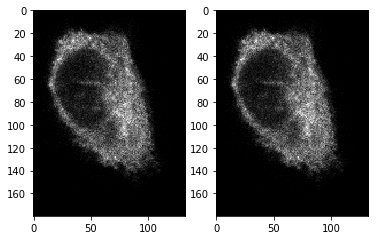

In [118]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(gpi_images[0], cmap = plt.cm.gray)
ax2.imshow(mean, cmap = plt.cm.gray)

In [119]:
mean1 = (gpi_images[2] / np.nanmean(gpi_images[2]))

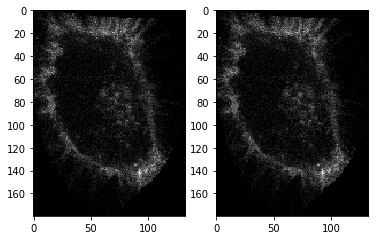

In [120]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(gpi_images[2], cmap = plt.cm.gray)
ax2.imshow(mean1, cmap = plt.cm.gray)

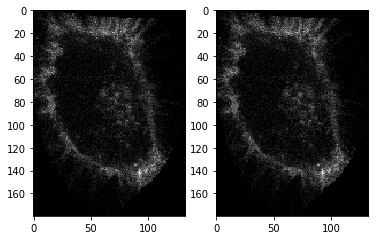

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(gpi_images[2], cmap = plt.cm.gray)
ax2.imshow((gpi_images[2] / gpi_images[2].max()), cmap = plt.cm.gray)

AttributeError: 'AxesSubplot' object has no attribute 'jointplot'

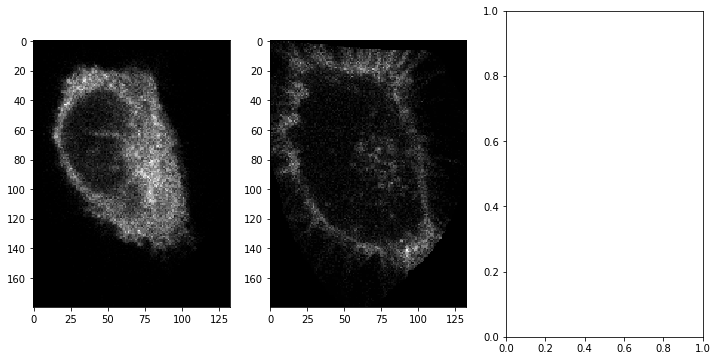

In [129]:
#plot original channels + jointplot
#plot filtered channels + jointplot

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (12,6))
ax1.imshow(gpi_images[0], cmap = plt.cm.gray)
ax2.imshow(gpi_images[2], cmap = plt.cm.gray)
#sns.kdeplot(data = gpi_images[0], data2 = gpi_images[2], ax = ax3)
ax3.jointplot(x = gpi_images[0], y = gpi_images[2], kind = "kde")

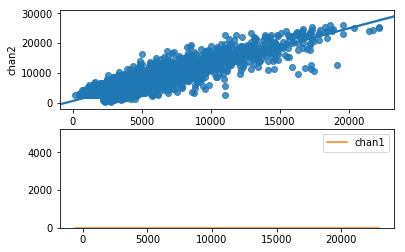

In [135]:
f, (ax1, ax2) = plt.subplots(2)
sns.regplot(x = df_filter['chan1'], y = df_filter['chan2'], ax=ax1)
sns.kdeplot(df_filter['chan1'], ax=ax2)

AttributeError: 'AxesSubplot' object has no attribute 'sns'

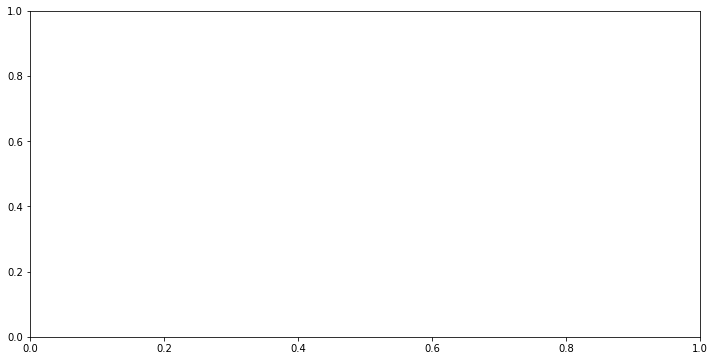

In [156]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(111)
ax1.sns.distplot(a = df_filter['chan1'].dropna())

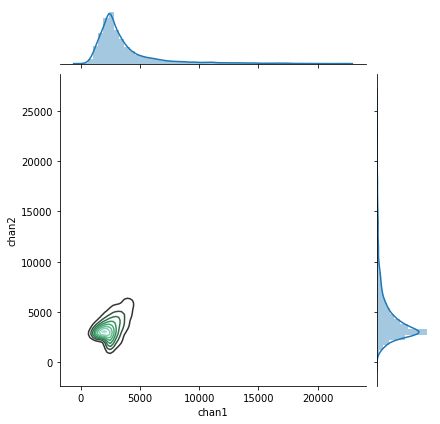

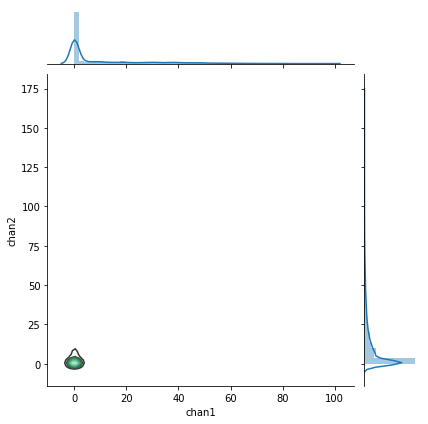

In [162]:
g = sns.JointGrid(x="chan1", y="chan2", data=df_filter.dropna()) 
g.plot_joint(sns.kdeplot) 
g.plot_marginals(sns.distplot)

g2 = sns.JointGrid(x="chan1", y="chan2", data=gpi_df.dropna()) 
g2.plot_joint(sns.kdeplot) 
g2.plot_marginals(sns.distplot)

In [14]:
df.iloc[:, 1]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
93375    0
93376    0
93377    0
93378    0
93379    0
93380    0
93381    0
93382    0
93383    0
93384    0
93385    0
93386    0
93387    0
93388    0
93389    0
93390    0
93391    0
93392    0
93393    0
93394    0
93395    0
93396    0
93397    0
93398    0
93399    0
93400    0
93401    0
93402    0
93403    0
93404    0
Name: chan2, Length: 93405, dtype: uint16